### 패키지 참조

In [44]:
from pandas import DataFrame,read_csv,read_excel,merge,melt,pivot_table
import numpy
from matplotlib import pyplot as plt
import seaborn as sb
import sys
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from factor_analyzer.factor_analyzer import calculate_kmo

### 폰트세팅

In [45]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [46]:
origin=read_excel('행정동병합최종.xlsx')
origin.head(2)

,Unnamed: 0,시도명,시군구코드,시군구명,행정동코드,행정동코드_수정,읍면동명,생성일자,말소일자,지하철역_수,...,세대당공원면적minmax,수변점수,행정동별버스정류장수,행정동별유통업체수,공공자전거대여소수,인구밀도,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,그린지수minmax
0,0,서울특별시,11110,종로구,1111051500,11110515,청운효자동,20081101,0,0,...,0.352898,0,32,0,3,4552.529183,0.062205,0.166880,0.133927,0.212495
1,1,서울특별시,11110,종로구,1111053000,11110530,사직동,19880423,0,2,...,0.063554,0,27,0,12,7611.382114,0.038557,0.044126,0.184545,0.038269


### 읍면동 및 지수만 뽑아내기

In [47]:
origin1=origin.filter(['읍면동명','그린지수minmax','여가생활지수minmax','사회적약자_지원_인프라_밀집도minmax','접근성지수minmax'])
origin1.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


In [48]:
origin1.isna().sum()
origin2=origin1.copy()
origin2.head(2)

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax
0,청운효자동,0.212495,0.062205,0.166880,0.133927
1,사직동,0.038269,0.038557,0.044126,0.184545


### 그린지수, 여가생활지수

In [49]:
origin3=origin2.copy()
X = origin3.iloc[:,[1,2]].values #x값으로 그린지수,여가생활지수 지정
X[:5]

array([[0.21249473, 0.06220496],
       [0.03826857, 0.0385567 ],
       [0.60214289, 0.18271093],
       [0.60214289, 0.03841368],
       [0.60286054, 0.1072489 ]])

In [50]:
dbscan=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan.fit(X)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [51]:
cluster_label=dbscan.labels_
cluster_label

array([-1,  0, -1,  1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  2,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  3,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  4,  1,  1,  1,  0,  0,  1,  1,  1,  3,  1,  1,
        1,  1,  2,  1,  5,  0,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1,
        4,  1,  3,  1,  2,  1,  1,  1,  6,  6,  1,  1,  1,  7,  2,  1,  1,
        1,  1,  1,  4,  1,  1,  1,  1,  1, -1,  1,  1,  1,  4,  2,  1,  2,
        1,  1,  1,  1,  4,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  0,  1,  5,  5,  1,  1,  0,  4,  0,  0,  0,  1, -1,  1,
        0,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  8,  1,  1,
        1,  1,  1,  2,  1,  3,  1, -1,  0, -1,  1,  1,  0,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  0,  0,  0,
        7,  1,  1,  1,  2,  1, -1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  6,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  6,  0,  1,  0,  0,
        0,  0,  0,  0,  2

In [52]:
origin3['cluster_id'] = cluster_label
origin3.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
1,사직동,0.038269,0.038557,0.044126,0.184545,0
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
3,부암동,0.602143,0.038414,0.144440,0.162233,1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1


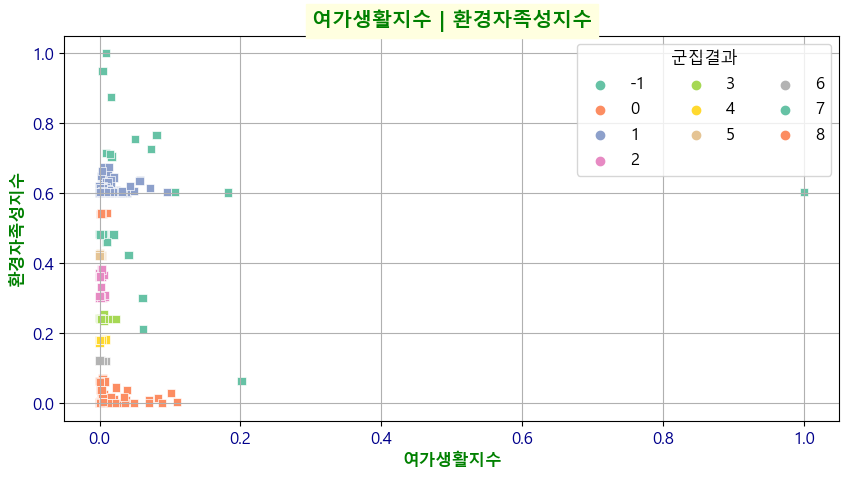

In [53]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin3,x='여가생활지수minmax',y='그린지수minmax',hue=cluster_label,palette='Set2',marker='s')
plt.title('여가생활지수 | 환경자족성지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(1.0,1.0),ncol=3)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [54]:
origin3[origin3['cluster_id']==-1]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
24,신당동,0.301071,0.060999,0.010696,0.057917,-1
94,면목제4동,0.949815,0.004376,0.033877,0.028933,-1
134,번제2동,0.714229,0.009150,0.037206,0.048466,-1
160,중계제4동,1.000000,0.009503,0.071953,0.033002,-1
162,상계제1동,0.874020,0.016684,0.477411,0.181578,-1
193,홍은제2동,0.705038,0.017193,0.113894,0.103506,-1


In [55]:
origin3_final=DataFrame(origin3[origin3['cluster_id']==-1])
origin3_final.to_excel('./교집합결과/여가생활,그린지수voting2.xlsx')

### 그린지수, 사회적약자지수

In [56]:
origin4=origin2.copy()
Y = origin4.iloc[:,[1,3]].values #x값으로 그린지수,사회적약자지수 지정
Y[:5]

array([[0.21249473, 0.16688035],
       [0.03826857, 0.04412614],
       [0.60214289, 0.11827713],
       [0.60214289, 0.14444004],
       [0.60286054, 0.65870172]])

In [57]:
#eps=0.04,min_samples=5,leaf_size=10,metric='chebyshev'
dbscan1=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan1.fit(Y)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [58]:
cluster_label1=dbscan1.labels_
cluster_label1

array([-1,  0,  1,  1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  2,  1,
       -1,  0, -1,  0,  0,  0,  0,  2,  0,  0,  0,  3,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  4,  1,  1,  1,  0,  0,  1,  1,  1,  3,  1,  1,
        1,  1,  2,  1,  5,  0,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1,
        4,  1,  3,  1,  2,  1,  1,  1,  6, -1,  1,  1,  1,  7,  2,  1,  1,
        1,  1,  1,  4,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  2,  1,  2,
        1,  1,  1,  1,  4,  1,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0, -1,
        0,  0,  1,  0,  1,  5,  5,  1,  1,  0,  4,  0,  0,  0,  1, -1,  1,
        0,  1,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  0, -1,  1,  1,  0,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  0,  0,  0,
       -1, -1,  1,  1,  2,  1, -1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  6,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  6,  0,  1,  0,  0,
        0,  0,  0,  0,  2

In [59]:
origin4['cluster_id'] = cluster_label1
origin4.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
1,사직동,0.038269,0.038557,0.044126,0.184545,0
2,삼청동,0.602143,0.182711,0.118277,0.233276,1
3,부암동,0.602143,0.038414,0.144440,0.162233,1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1


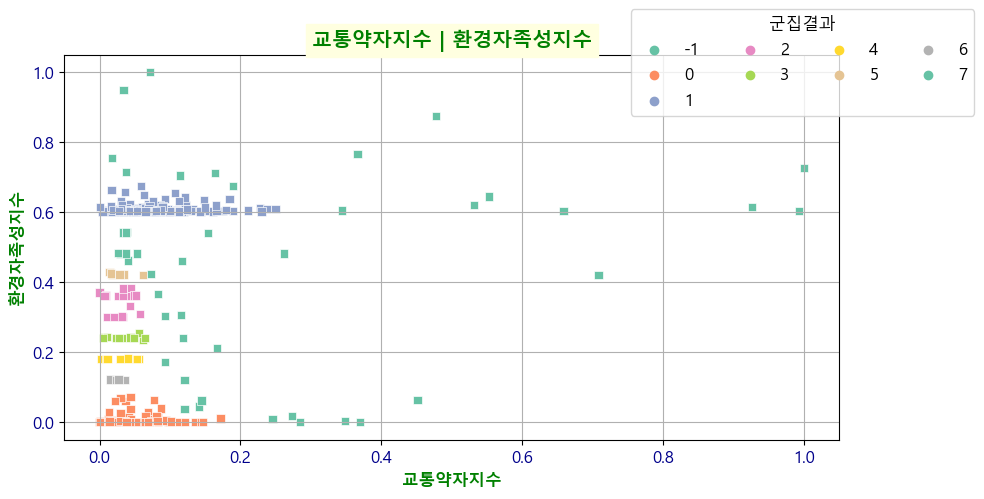

In [60]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin4,x='사회적약자_지원_인프라_밀집도minmax',y='그린지수minmax',hue=cluster_label1,palette='Set2',marker='s')
plt.title('교통약자지수 | 환경자족성지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('교통약자지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(0.72,0.82),ncol=4)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [61]:
origin4[origin4['cluster_id']==-1]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
17,소공동,0.009355,0.070369,0.245428,0.346411,-1
19,명동,0.003588,0.109953,0.348319,0.445224,-1
77,구의제2동,0.120498,0.008995,0.120585,0.030412,-1
94,면목제4동,0.949815,0.004376,0.033877,0.028933,-1
98,면목제3.8동,0.172564,0.000000,0.092929,0.055345,-1
118,정릉제3동,0.000019,0.019245,0.284930,0.124092,-1
134,번제2동,0.714229,0.009150,0.037206,0.048466,-1


In [62]:
origin4_final=DataFrame(origin4[origin4['cluster_id']==-1])
origin4_final.to_excel('./교집합결과/사회적약자,그린지수voting2.xlsx')

### 그린지수, 접근성지수

In [63]:
origin5=origin2.copy()
Z = origin5.iloc[:,[1,4]].values #x값으로 그린지수,접근성지수 지정
Z[:5]

array([[0.21249473, 0.1339273 ],
       [0.03826857, 0.18454452],
       [0.60214289, 0.23327645],
       [0.60214289, 0.16223314],
       [0.60286054, 0.56071557]])

In [64]:
#eps=0.07,min_samples=20,leaf_size=20,metric='chebyshev'
dbscan2=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan2.fit(Z)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [65]:
cluster_label2=dbscan2.labels_
cluster_label2

array([-1,  1, -1,  0, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  2,  0,
       -1, -1, -1,  1,  1,  1,  1,  2,  1,  1,  1,  3,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  4, -1,  0,  0,  1,  1, -1,  0,  0,  3,  0,  0,
        0,  0,  2,  0,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,
        4,  0,  3,  0,  2,  0,  0,  0,  6,  6,  0,  0,  0,  7,  2,  0,  0,
        0,  0,  0,  4,  0,  0,  0,  0,  0, -1,  0,  0,  0,  4,  2,  0,  2,
        0,  0,  0,  0,  4,  0,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,
        1,  1,  0,  1,  0,  5,  5,  0,  0,  1,  4,  1,  1,  1,  0, -1,  0,
        1,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  2,  0,  3,  0, -1,  1, -1,  0,  0,  1,  0,  3,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  1,  1,  1,
       -1, -1,  0,  0,  2,  0, -1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  6,  1,  0,  1,  1,
        1,  1,  1,  1,  2

In [66]:
origin5['cluster_id'] = cluster_label2
origin5.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
1,사직동,0.038269,0.038557,0.044126,0.184545,1
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,-1


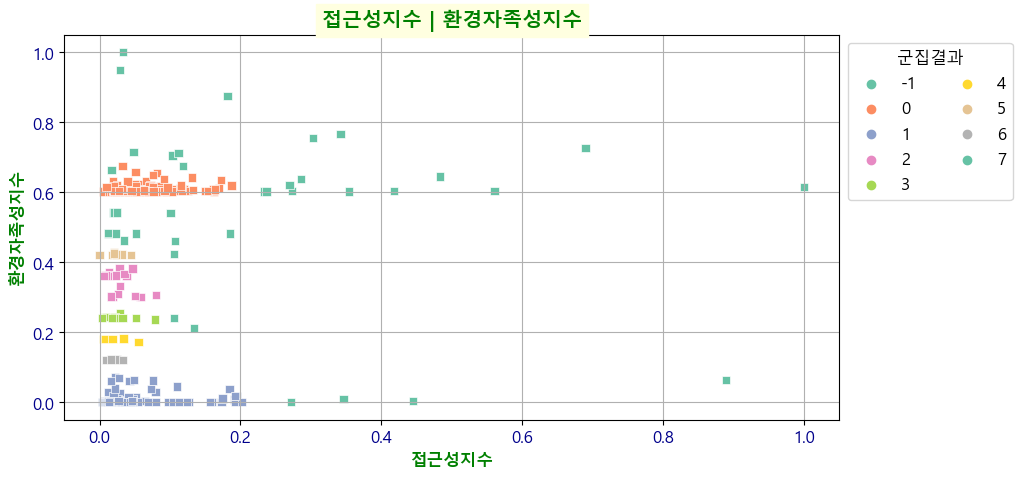

In [67]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin5,x='접근성지수minmax',y='그린지수minmax',hue=cluster_label2,palette='Set2',marker='s')
plt.title('접근성지수 | 환경자족성지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('접근성지수', color='green',fontweight='bold')
plt.ylabel('환경자족성지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(1.0,1.0),ncol=2)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [68]:
origin5[origin5['cluster_id']==-1].head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,-1
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
17,소공동,0.009355,0.070369,0.245428,0.346411,-1


In [57]:
origin5_final=DataFrame(origin5[origin5['cluster_id']==-1])
origin5_final.to_excel('./교집합결과/접근성지수,그린지수voting2.xlsx')

### 여가생활지수, 사회적약자지수

In [69]:
origin6=origin2.copy()
XX = origin6.iloc[:,[2,3]].values #x값으로 여가생활지수,사회적약자지수 지정
XX[:5]

array([[0.06220496, 0.16688035],
       [0.0385567 , 0.04412614],
       [0.18271093, 0.11827713],
       [0.03841368, 0.14444004],
       [0.1072489 , 0.65870172]])

In [70]:
#eps=0.05,min_samples=20,leaf_size=20,metric='chebyshev'
dbscan3=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan3.fit(XX)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [71]:
cluster_label3=dbscan3.labels_
cluster_label3

array([ 0,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [72]:
origin6['cluster_id'] = cluster_label3
origin6.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,0
1,사직동,0.038269,0.038557,0.044126,0.184545,0
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,-1


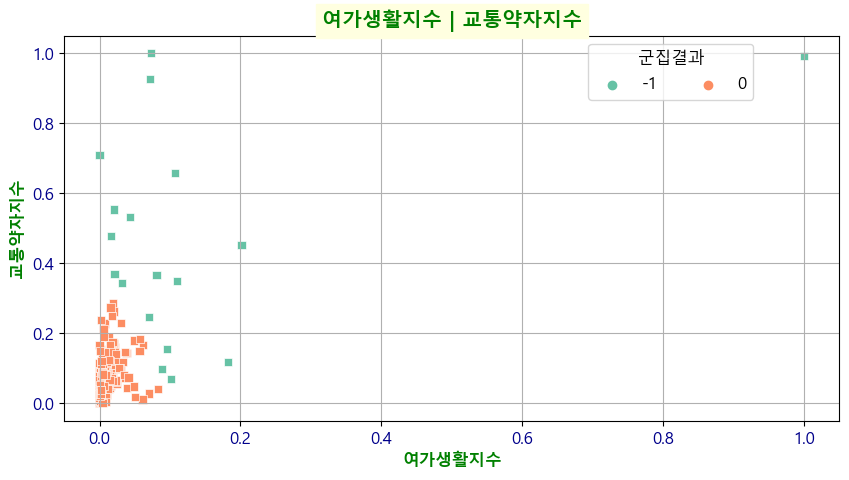

In [73]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin6,x='여가생활지수minmax',y='사회적약자_지원_인프라_밀집도minmax',hue=cluster_label3,palette='Set2',marker='s')
plt.title('여가생활지수 | 교통약자지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('교통약자지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(0.9,1.0),ncol=2)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [74]:
origin6[origin6['cluster_id']==-1]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
10,이화동,0.029424,0.101785,0.068982,0.079652,-1
17,소공동,0.009355,0.070369,0.245428,0.346411,-1
18,회현동,0.000000,0.089151,0.098079,0.272260,-1
19,명동,0.003588,0.109953,0.348319,0.445224,-1
40,한강로동,0.603270,0.096164,0.154034,0.417533,-1
162,상계제1동,0.874020,0.016684,0.477411,0.181578,-1
213,상암동,0.726448,0.072779,1.000000,0.689607,-1


In [75]:
origin6_final=DataFrame(origin6[origin6['cluster_id']==-1])
origin6_final.to_excel('./교집합결과/여가생활,사회적약자voting2.xlsx')

### 여가생활지수, 접근성지수

In [76]:
origin7=origin2.copy()
YY = origin7.iloc[:,[2,4]].values #x값으로 여가생활지수,접근성지수 지정
YY[:5]

array([[0.06220496, 0.1339273 ],
       [0.0385567 , 0.18454452],
       [0.18271093, 0.23327645],
       [0.03841368, 0.16223314],
       [0.1072489 , 0.56071557]])

In [77]:
dbscan4=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan4.fit(YY)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [78]:
cluster_label4=dbscan4.labels_
cluster_label4

array([ 0,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [79]:
origin7['cluster_id'] = cluster_label4
origin7.head()

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,0
1,사직동,0.038269,0.038557,0.044126,0.184545,0
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,-1


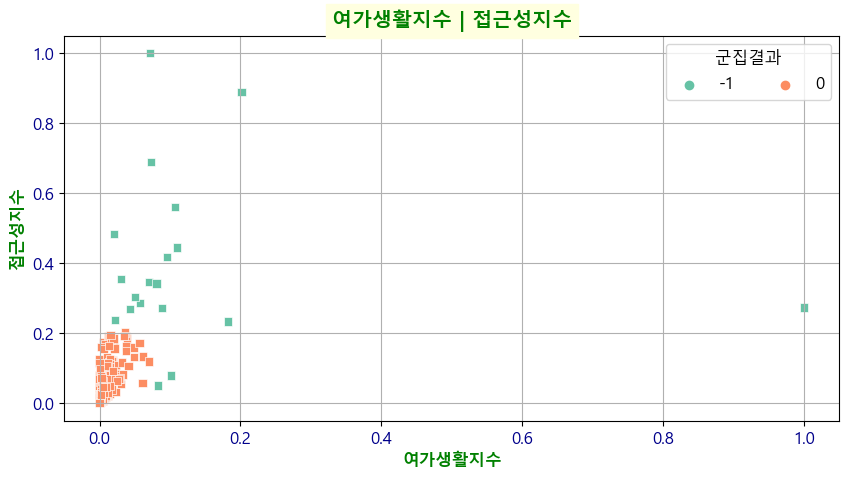

In [80]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin7,x='여가생활지수minmax',y='접근성지수minmax',hue=cluster_label4,palette='Set2',marker='s')
plt.title('여가생활지수 | 접근성지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('여가생활지수', color='green',fontweight='bold')
plt.ylabel('접근성지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(1.0,1.0),ncol=2)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [81]:
origin7[origin7['cluster_id']==-1]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
10,이화동,0.029424,0.101785,0.068982,0.079652,-1
11,혜화동,0.014460,0.082661,0.041164,0.051027,-1
17,소공동,0.009355,0.070369,0.245428,0.346411,-1
18,회현동,0.000000,0.089151,0.098079,0.272260,-1
19,명동,0.003588,0.109953,0.348319,0.445224,-1
40,한강로동,0.603270,0.096164,0.154034,0.417533,-1
45,한남동,0.602143,0.021840,0.161413,0.236909,-1


In [82]:
origin7_1final=DataFrame(origin7[origin7['cluster_id']==-1])
origin7_1final.to_excel('./교집합결과/여가생활,접근성지수voting2.xlsx')

### 사회적약자지수, 접근성지수

In [83]:
origin8=origin2.copy()
ZZ = origin8.iloc[:,[3,4]].values #x값으로 사회적약자지수, 접근성지수 지정
ZZ[:5]

array([[0.16688035, 0.1339273 ],
       [0.04412614, 0.18454452],
       [0.11827713, 0.23327645],
       [0.14444004, 0.16223314],
       [0.65870172, 0.56071557]])

In [84]:
#eps=0.08,min_samples=20,leaf_size=10,metric='chebyshev'
dbscan5=DBSCAN(eps=0.03,min_samples=5,leaf_size=10,metric='chebyshev')
dbscan5.fit(ZZ)

DBSCAN(eps=0.03, leaf_size=10, metric='chebyshev')

In [85]:
cluster_label5=dbscan5.labels_
cluster_label5

array([ 0, -1, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [86]:
origin8['cluster_id'] = cluster_label5
origin8

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
0,청운효자동,0.212495,0.062205,0.166880,0.133927,0
1,사직동,0.038269,0.038557,0.044126,0.184545,-1
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
3,부암동,0.602143,0.038414,0.144440,0.162233,0
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
...,...,...,...,...,...,...
401,성내제2동,0.240970,0.002084,0.027923,0.032763,0
402,성내제3동,0.542149,0.001992,0.037726,0.025227,0
403,길동,0.002587,0.005104,0.082530,0.046456,0
404,둔촌제1동,0.421500,0.000000,0.708442,0.000000,-1


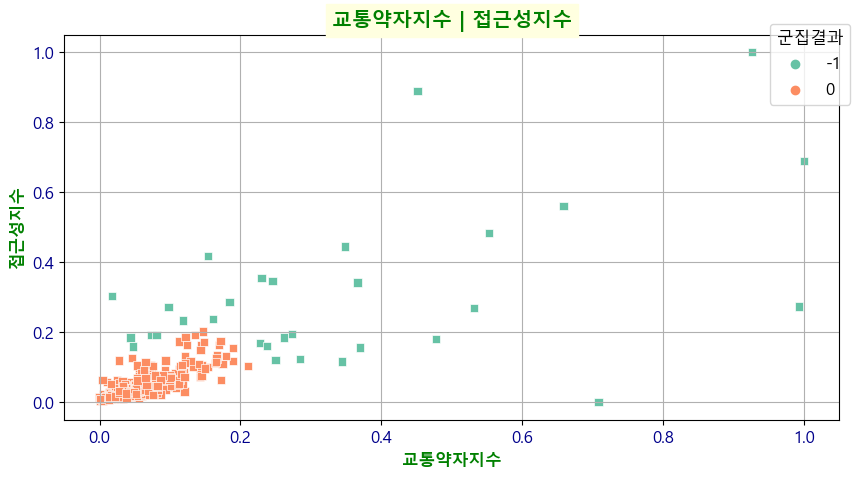

In [87]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin8,x='사회적약자_지원_인프라_밀집도minmax',y='접근성지수minmax',hue=cluster_label5,palette='Set2',marker='s')
plt.title('교통약자지수 | 접근성지수', color='green',fontweight='bold',backgroundcolor='lightyellow')
plt.xlabel('교통약자지수', color='green',fontweight='bold')
plt.ylabel('접근성지수', color='green',fontweight='bold')
plt.legend(title='군집결과',title_fontsize=12,bbox_to_anchor=(0.9,1.05),ncol=1)
plt.xticks(fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
plt.grid()
plt.show()
plt.close()

In [88]:
origin8[origin8['cluster_id']==-1]

,읍면동명,그린지수minmax,여가생활지수minmax,사회적약자_지원_인프라_밀집도minmax,접근성지수minmax,cluster_id
1,사직동,0.038269,0.038557,0.044126,0.184545,-1
2,삼청동,0.602143,0.182711,0.118277,0.233276,-1
4,평창동,0.602861,0.107249,0.658702,0.560716,-1
8,종로1.2.3.4가동,0.063833,0.201658,0.451458,0.889024,-1
17,소공동,0.009355,0.070369,0.245428,0.346411,-1
18,회현동,0.000000,0.089151,0.098079,0.272260,-1
19,명동,0.003588,0.109953,0.348319,0.445224,-1
21,장충동,0.000000,0.049411,0.047603,0.158972,-1
23,을지로동,0.007869,0.036840,0.073679,0.191130,-1
40,한강로동,0.603270,0.096164,0.154034,0.417533,-1


In [49]:
origin8_final=DataFrame(origin8[origin8['cluster_id']==-1])
origin8_final.to_excel('./교집합결과/사회적약자,접근성지수voting2.xlsx')

> - DBSCAN의 경우 이상치에 민감하다<br>
> - 파라미터를 전부 같은 값으로 설정하고 군집모델을 실행했을 때 일부는 적절하게 분리가 됬지만 일부는 한개의 군집만 판별하고 나머지는 전부 이상치로 판단하였다.<br>
> - 그러나 현 데이터 특성상 군집이 한군데에 몰려있기 때문에 오히려 특정지수가 극단적으로 높은 이상치를 대상으로 한다(적절한 데이터(군집)으로 판단한다)<br>
> - 이유는 어떤 한 지수라도 높아야 보행일상권 대상에 포함이 되기 때문에<br>
> - 결론적으로 KMeans로 추출한 행정동과 DBSCAN으로 추출한 지수가 높은 행정동을 비교해 지수가 높은 행정동을 중심으로 최적의 입지 후보지라고 판단.